# imports

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd

# load and split dataset

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

scaler = StandardScaler() # scaling only for KNN
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# inspect dataset

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
X_train[:3], y_train[:3]

(array([[2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01, 1.328e-01,
         1.980e-01, 1.043e-01, 1.809e-01, 5.883e-02, 7.572e-01, 7.813e-01,
         5.438e+00, 9.444e+01, 1.149e-02, 2.461e-02, 5.688e-02, 1.885e-02,
         1.756e-02, 5.115e-03, 2.254e+01, 1.667e+01, 1.522e+02, 1.575e+03,
         1.374e-01, 2.050e-01, 4.000e-01, 1.625e-01, 2.364e-01, 7.678e-02],
        [9.667e+00, 1.849e+01, 6.149e+01, 2.891e+02, 8.946e-02, 6.258e-02,
         2.948e-02, 1.514e-02, 2.238e-01, 6.413e-02, 3.776e-01, 1.350e+00,
         2.569e+00, 2.273e+01, 7.501e-03, 1.989e-02, 2.714e-02, 9.883e-03,
         1.960e-02, 3.913e-03, 1.114e+01, 2.562e+01, 7.088e+01, 3.852e+02,
         1.234e-01, 1.542e-01, 1.277e-01, 6.560e-02, 3.174e-01, 8.524e-02],
        [1.350e+01, 1.271e+01, 8.569e+01, 5.662e+02, 7.376e-02, 3.614e-02,
         2.758e-03, 4.419e-03, 1.365e-01, 5.335e-02, 2.244e-01, 6.864e-01,
         1.509e+00, 2.039e+01, 3.338e-03, 3.746e-03, 2.030e-03, 3.242e-03,
         1.480e-02, 1.5

# train 3 classifiers

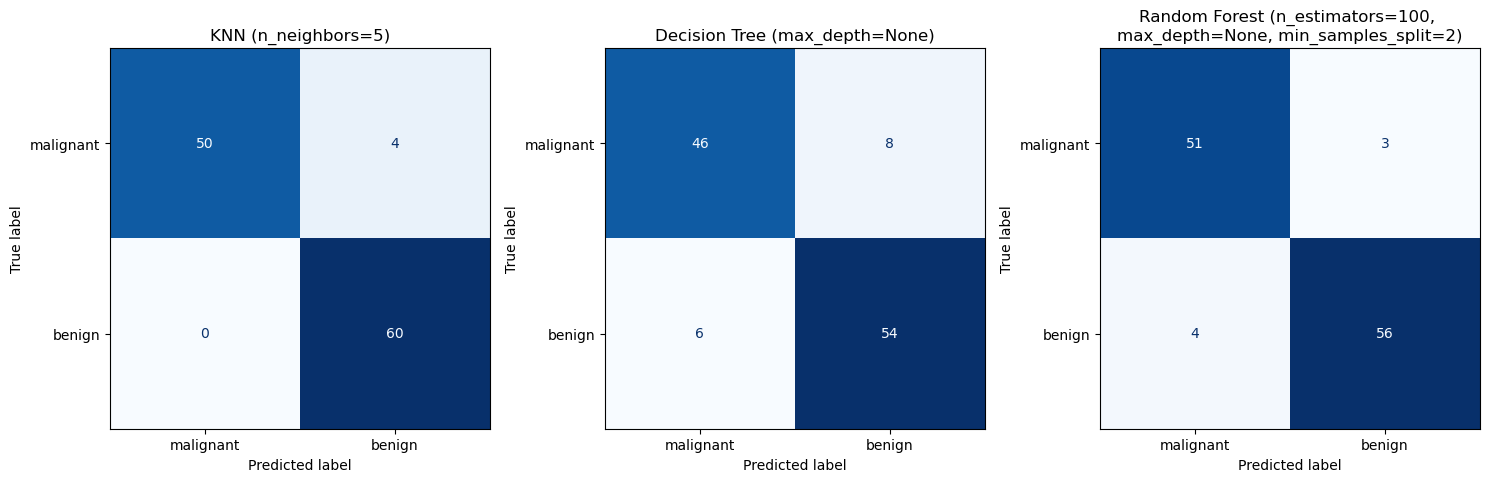

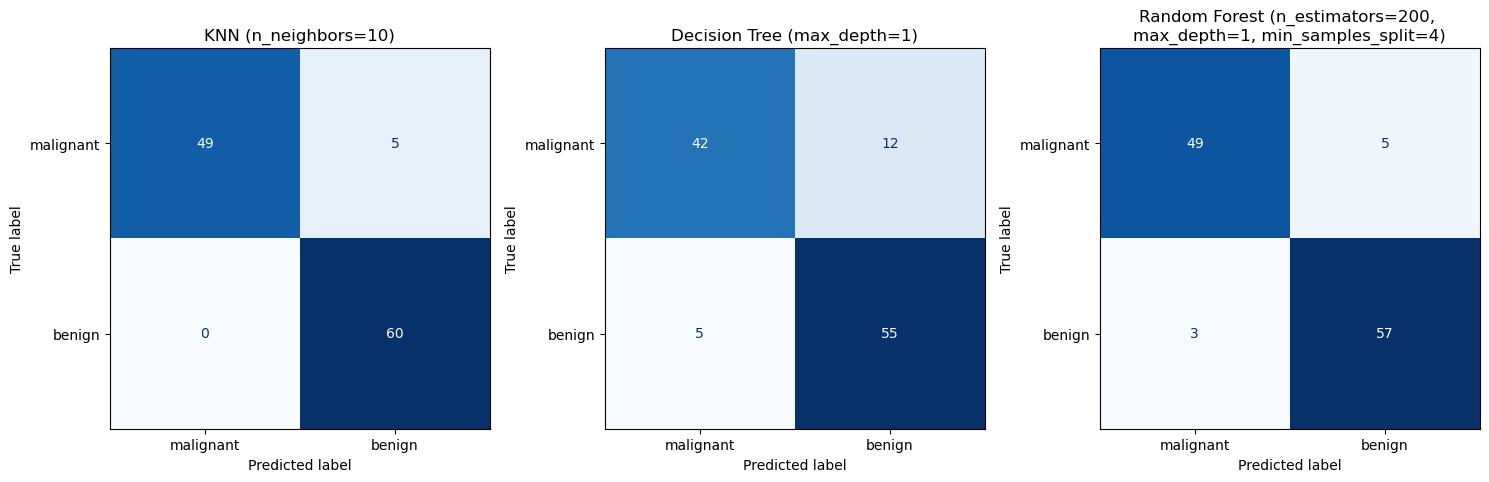

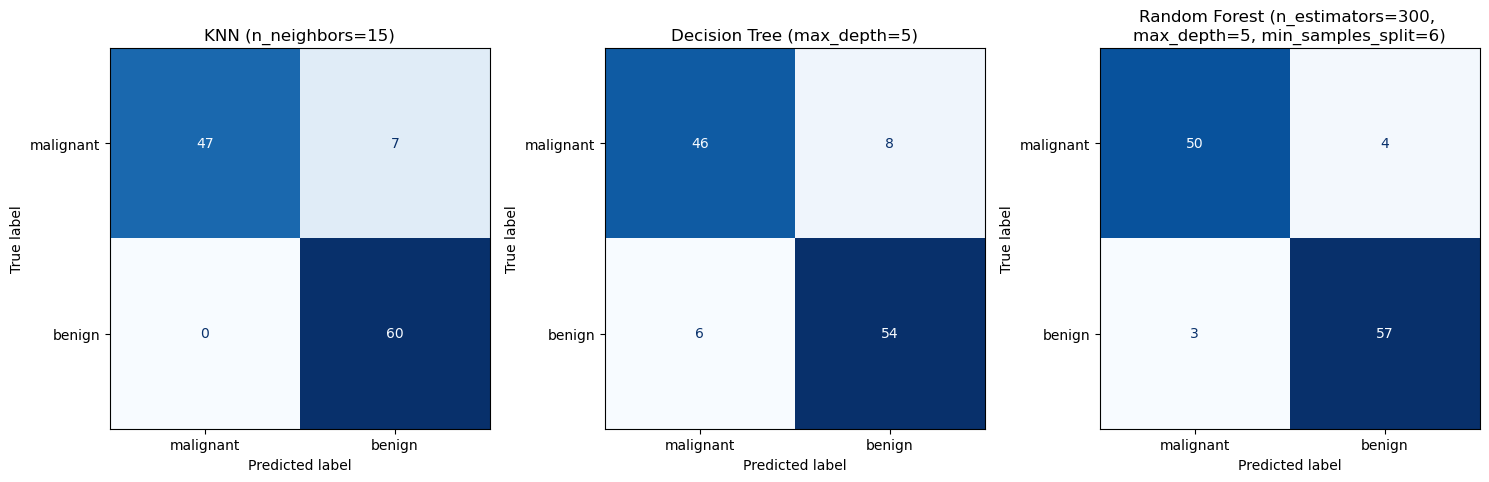

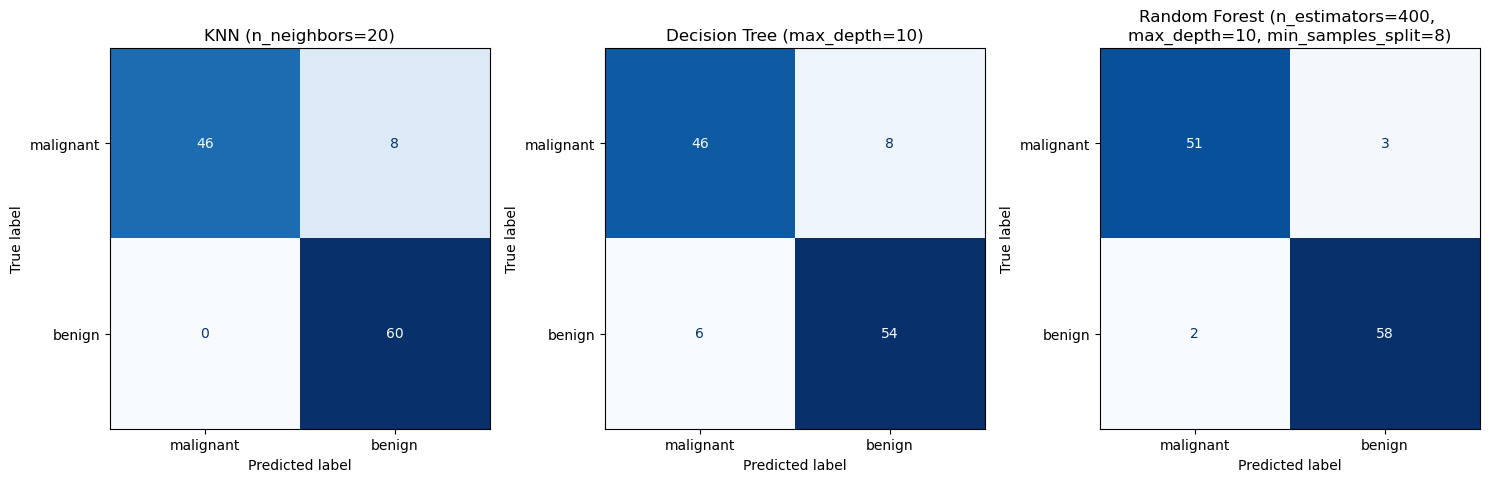

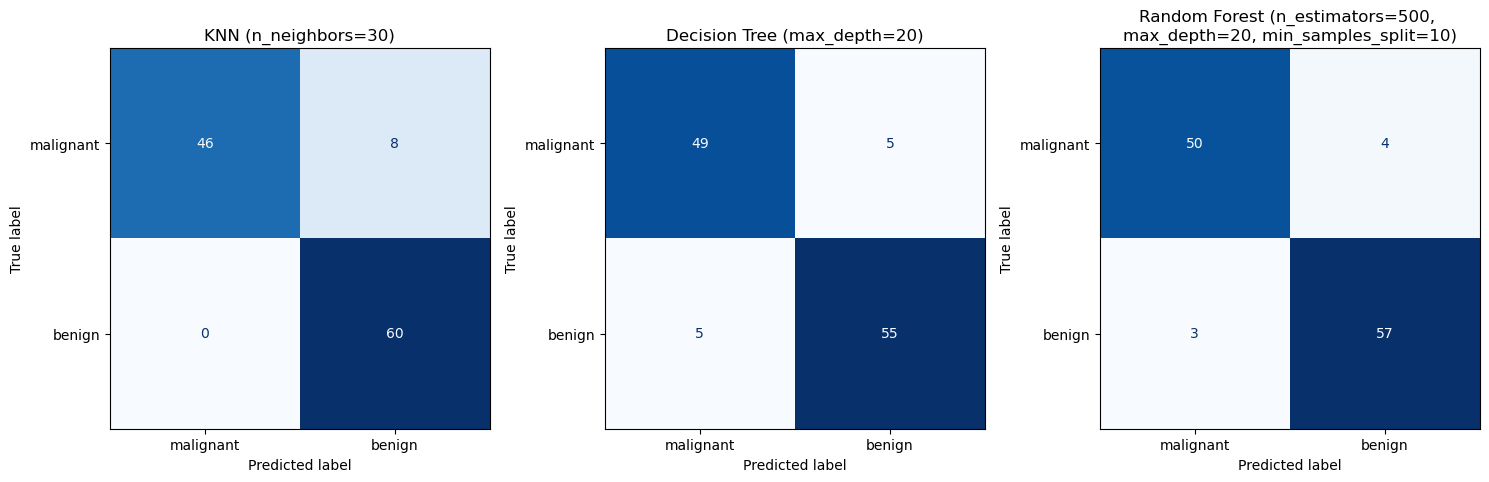

In [48]:
knn_n_neighbors = [5, 10, 15, 20, 30]
dt_max_depth = [None, 1, 5, 10, 20]
rf_n_estimators = [100, 200, 300, 400, 500]
rf_max_depth = [None, 1, 5, 10, 20]
rf_min_samples_split = [2, 4, 6, 8, 10]

da_df = pd.DataFrame()
for i in range(5):
    clf_knn = KNeighborsClassifier(n_neighbors=knn_n_neighbors[i])
    clf_dt = DecisionTreeClassifier(max_depth=dt_max_depth[i])
    clf_rf = RandomForestClassifier(
        n_estimators=rf_n_estimators[i],
        max_depth=rf_max_depth[i],
        min_samples_split=rf_min_samples_split[i]
    )

    clf_knn = clf_knn.fit(X_train_scaled, y_train)
    clf_dt = clf_dt.fit(X_train, y_train)
    clf_rf = clf_rf.fit(X_train, y_train)

    clf_knn_pred = clf_knn.predict(X_test_scaled)
    clf_dt_pred = clf_dt.predict(X_test)
    clf_rf_pred = clf_rf.predict(X_test)

    # print reports

    cr1 = classification_report(y_test, clf_knn_pred, output_dict=True)
    cr2 = classification_report(y_test, clf_dt_pred, output_dict=True)
    cr3 = classification_report(y_test, clf_rf_pred, output_dict=True)

    df1 = pd.DataFrame(cr1).transpose()
    df2 = pd.DataFrame(cr2).transpose()
    df3 = pd.DataFrame(cr3).transpose()

    dn1 = f'KNN (n_neighbors={knn_n_neighbors[i]})'
    dn2 = f'Decision Tree (max_depth={dt_max_depth[i]})'
    dn3 = f'Random Forest (n_estimators={rf_n_estimators[i]}, \nmax_depth={rf_max_depth[i]}, min_samples_split={rf_min_samples_split[i]})'

    mc1 = cr1["macro avg"]
    mc2 = cr2["macro avg"]
    mc3 = cr3["macro avg"]

    temp_df = pd.DataFrame([
        {"Model": dn1, "Accuracy": cr1["accuracy"], "Precision": mc1["precision"], "Recall": mc1["recall"], "F1-Score": mc1["f1-score"]},
        {"Model": dn2, "Accuracy": cr2["accuracy"], "Precision": mc2["precision"], "Recall": mc2["recall"], "F1-Score": mc2["f1-score"]},
        {"Model": dn3, "Accuracy": cr3["accuracy"], "Precision": mc3["precision"], "Recall": mc3["recall"], "F1-Score": mc3["f1-score"]}
    ])
    da_df = pd.concat([da_df, temp_df], ignore_index=True)
    
    # display chart

    fig, axs = plt.subplots(1, 3, figsize=(15, 6))

    for idx, (clf_pred, title) in enumerate(zip(
        [clf_knn_pred, clf_dt_pred, clf_rf_pred],
        [dn1, dn2, dn3]
    )):
        cm = confusion_matrix(y_test, clf_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['malignant', 'benign'])
        
        disp.plot(ax=axs[idx], cmap="Blues", colorbar=False)
        axs[idx].set_title(title)

    plt.tight_layout()
    plt.show()

# print latex table

In [52]:
display(da_df)
print(da_df.to_latex(index=False))

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN (n_neighbors=5),0.964912,0.968750,0.962963,0.964640
1,Decision Tree (max_depth=None),0.877193,0.877792,0.875926,0.876585
2,"Random Forest (n_estimators=100, \nmax_depth=N...",0.938596,0.938213,0.938889,0.938478
3,KNN (n_neighbors=10),0.956140,0.961538,0.953704,0.955728
4,Decision Tree (max_depth=1),0.850877,0.857256,0.847222,0.848912
5,"Random Forest (n_estimators=200, \nmax_depth=1...",0.929825,0.930831,0.928704,0.929477
6,KNN (n_neighbors=15),0.938596,0.947761,0.935185,0.937787
7,Decision Tree (max_depth=5),0.877193,0.877792,0.875926,0.876585
8,"Random Forest (n_estimators=300, \nmax_depth=5...",0.938596,0.938911,0.937963,0.938364
9,KNN (n_neighbors=20),0.929825,0.941176,0.925926,0.928750


\begin{tabular}{lrrrr}
\toprule
Model & Accuracy & Precision & Recall & F1-Score \\
\midrule
KNN (n_neighbors=5) & 0.964912 & 0.968750 & 0.962963 & 0.964640 \\
Decision Tree (max_depth=None) & 0.877193 & 0.877792 & 0.875926 & 0.876585 \\
Random Forest (n_estimators=100, 
max_depth=None, min_samples_split=2) & 0.938596 & 0.938213 & 0.938889 & 0.938478 \\
KNN (n_neighbors=10) & 0.956140 & 0.961538 & 0.953704 & 0.955728 \\
Decision Tree (max_depth=1) & 0.850877 & 0.857256 & 0.847222 & 0.848912 \\
Random Forest (n_estimators=200, 
max_depth=1, min_samples_split=4) & 0.929825 & 0.930831 & 0.928704 & 0.929477 \\
KNN (n_neighbors=15) & 0.938596 & 0.947761 & 0.935185 & 0.937787 \\
Decision Tree (max_depth=5) & 0.877193 & 0.877792 & 0.875926 & 0.876585 \\
Random Forest (n_estimators=300, 
max_depth=5, min_samples_split=6) & 0.938596 & 0.938911 & 0.937963 & 0.938364 \\
KNN (n_neighbors=20) & 0.929825 & 0.941176 & 0.925926 & 0.928750 \\
Decision Tree (max_depth=10) & 0.877193 & 0.877792 & 0.87592